In [1]:
import poser

from pathlib import Path

In [2]:
patterns = [
    poser.StructuralFingerprintPattern(
        core_name="bic",
        core_smarts="[#6]~1~[#6]~[#6]~2~[#6]~[#7:2]~[#6]~[#7]~[#6]~2~[#7:1]~1",
        dist_mappings=[
            poser.patterns.DistanceMapping(
                poser.patterns.LigandAtom(1),
                poser.patterns.LigandAtom(2),
                (0, 1000),
            ),
        ]
    )
]

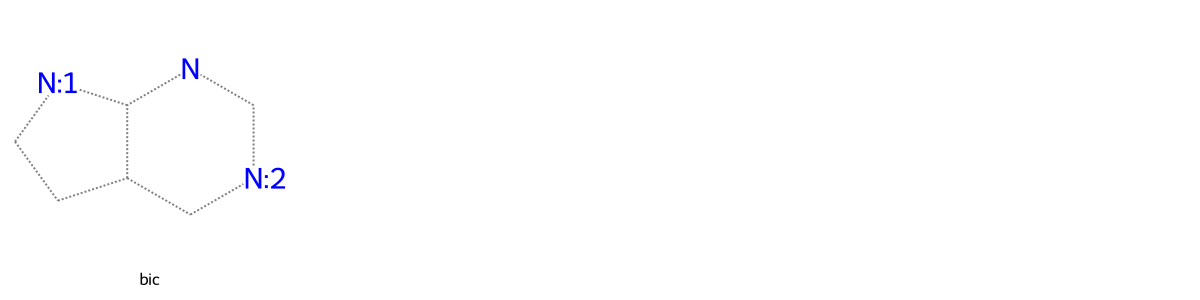

In [3]:
poser.patterns.draw_patterns(patterns)

In [ ]:
pipeline = poser.DockPipeline(
    receptor_path=Path("5s18-clean_Prep_Recep.pdb"),
    smi={
        "woy": "c1ncc2c(n1)NCC2",
        "lig2": "c1nc(F)c2c(n1)NCC2",
    },
    work_dir=Path("result"),
    box_center=(-2.398, 14.862, -0.02),
    box_size=(6.0, 2.0, 4.0),
    patterns=patterns,
    exhaustiveness= 2,
    n_poses= 3,
)



In [5]:
pipeline.run()

Pipeline state is stored at /mcp/data/result/ifd_pipeline.pkl
Open Babel 3.1.1 -- Jan  4 2023 -- 09:58:24
CompletedProcess(args=['obabel', '5s18-clean_Prep_Recep.pdb', '--partialcharge', 'gasteiger', '-xr', '-O', '/tmp/tmpqq1c011z/5s18-clean_Prep_Recep.pdbqt'], returncode=0, stdout=b'', stderr=b'1 molecule converted\n')
Computing Vina grid ... done.


Performing docking (random seed: -1717041475) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -2.967          0          0
   2    2.242e+05      2.027      2.636
   3    2.386e+05      2.088      3.192
Performing docking (random seed: -1717041475) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -3.852          0          0
   2       -3.562      1.815      2.345
   3    1.293e+05      1.949      2.667


Extracting woy
Extracting lig2


,min_score,best_pose,good_poses,pose_ratio,avg_score,avg_good_score
0,-2.967,0,[0],1.0,-2.967,-2.967
1,-3.852,0,"[0, 1]",1.0,-3.707,-3.707


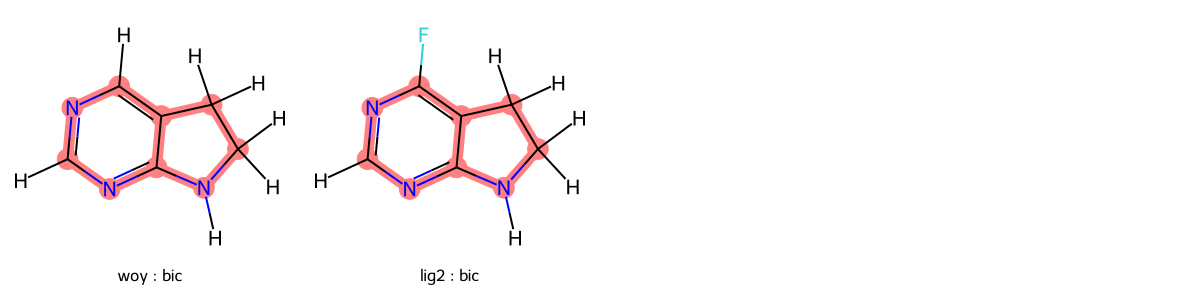

In [6]:
pipeline.highlight_patterns()